In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [3]:
from transformers import BertTokenizer, BertModel, AutoModelForSequenceClassification, AdamW, get_scheduler
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')                                                     
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=655)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [4]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AdamW, get_scheduler
model_name = "sberbank-ai/sbert_large_nlu_ru"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=655)
#попробуем позже

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/sbert_large_nlu_ru and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
#load best model
#model.load_state_dict(torch.load("../../best_model3004/pytorch_model.bin", map_location=device))

<All keys matched successfully>

In [5]:
torch.cuda.empty_cache()
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024

In [55]:
for param in model.parameters():
        param.requires_grad = True

In [24]:
model.classifier.requires_grad = True

In [2]:
df = pd.read_csv("../../cleareddata1406.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['g_id'] = pd.Series(df['g_id']).astype(str)

In [3]:
df.info

<bound method DataFrame.info of                 id                                              label  g_id
0        304999800  прочее мясо рыбы включая фарш мороженые рыбный...   304
1        604909900  растения засушенные обработанные антисептиком ...   604
2        711400000  огурцы корнишоны консервированные для кратковр...   711
3        712909000  овощи сущенные чеснок сушенный хлопья маркиров...   712
4        803901000              бананы свежие зеленые сорта cavendish   803
...            ...                                                ...   ...
115805  1207409000  кунжут семена кунжута очищенные не дробленные ...  1207
115806  1207409000  образцы для сертификационных работ семена кунж...  1207
115807  1207409000                                     семена кунжута  1207
115808  1207409000           семена кунжута дробленые или недробленые  1207
115809  1207409000  семена кунжута очищенные в мешках для пищевой ...  1207

[115810 rows x 3 columns]>

In [4]:
df[df['g_id']=='1018']

,id,label,g_id
221,1018059078,нижняя часть заднего бампера nl 4 lower body r...,1018
651,1018007197,стекло лобовое lcc windshield glass assy 1 шт,1018
652,1018059067,нижняя часть переднего бампера в сборе nl 4 lo...,1018
942,1018059078,нижняя часть заднего бампера nl 4 lower body r...,1018
1566,1018059078,нижняя часть заднего бампера nl 4 lower body r...,1018


In [5]:
g_id = []
for id in df['g_id']:
    if len(id) == 4:
        g_id.append(str(id)[:4])
    else:
        g_id.append('0' + str(id)[:3])
df['g_id'] = g_id

In [9]:
a = list(df['g_id'].unique())

In [11]:
dscr = pd.read_csv("desc.csv", sep=';', names=['id', 'label'])
ids = pd.Series(dscr['id'])
ids = ids.astype(str)
dscr['id'] = ids
ids = []
for i, id in enumerate(dscr['id']):
    if len(id) == 4:
        ids.append(str(id))
    else:
        ids.append('0' + str(id))
dscr['id'] = ids

In [13]:
withlabels = list(dscr['id'])
justids = list(df['g_id'].unique())
for each in justids:
    if each not in withlabels:
        print(each, len(df[df['g_id']==each]))

1062 2
1018 5
1012 5
1068 1
0391 1
5022 8
0481 1
5058 1
5032 1
5035 1
5052 1
5075 2
6908 1
0830 1


In [9]:
df.value_counts('g_id')

g_id
4011    9090
9503    8479
8708    5698
8504    3113
3305    3106
        ... 
1702       1
8540       1
1806       1
3505       1
0207       1
Length: 654, dtype: int64

In [10]:
df['id'] = df['g_id']
df = df.drop(['g_id'], axis=1, inplace=False)
df

,id,label
0,0304,прочее мясо рыбы включая фарш мороженые рыбный...
1,0604,растения засушенные обработанные антисептиком ...
2,0711,огурцы корнишоны консервированные для кратковр...
3,0712,овощи сущенные чеснок сушенный хлопья маркиров...
4,0803,бананы свежие зеленые сорта cavendish
...,...,...
115805,1207,кунжут семена кунжута очищенные не дробленные ...
115806,1207,образцы для сертификационных работ семена кунж...
115807,1207,семена кунжута
115808,1207,семена кунжута дробленые или недробленые


In [80]:
min_req = 20
filtered_classes = df.g_id.value_counts()[df.g_id.value_counts() > min_req].index.values

df = df[df.g_id.apply(lambda x: True if x in filtered_classes else False)]
df

,id,label,g_id
6,805102000,плоды цитрусовых культур апельсины свежие,0805
7,805210000,плоды цитрусовых культур мандарины свежие,0805
8,805290000,пробы и образцы для проведения работ по оценке...,0805
9,805501000,плоды цитрусовых культур лимоны свежие,0805
10,808108002,яблоки свежие в коробках сорт royal gala в...,0808
...,...,...,...
87483,1704907500,сливочные конфеты не содержащие какао тм sto...,1704
87484,1704907500,пищевой наполнитель для пром произв ва пищевой...,1704
87485,1704907500,тоффи карамели и аналогичные сладости не содер...,1704
87486,1704907500,кондитерские изделия из сахара не содержащие к...,1704


In [11]:
len(df['id'].unique())

654

In [6]:
counts = df.value_counts('id')
df_count = pd.DataFrame(data={'id': counts.index, 'count': counts.values})

In [7]:
df_count

,id,count
0,8708299009,2488
1,3926909709,1308
2,8708999709,776
3,9503007500,770
4,8708109009,751
...,...,...
2605,4016950000,1
2606,8425390006,1
2607,4014900000,1
2608,4013100001,1


In [8]:
df_count.to_csv('../../tnveds_sort.csv')

In [9]:
df

,id,label
0,0304,прочее мясо рыбы включая фарш мороженые рыбный...
1,0604,растения засушенные обработанные антисептиком ...
2,0711,огурцы корнишоны консервированные для кратковр...
3,0712,овощи сущенные чеснок сушенный хлопья маркиров...
4,0803,бананы свежие зеленые сорта cavendish
...,...,...
115805,1207,кунжут семена кунжута очищенные не дробленные ...
115806,1207,образцы для сертификационных работ семена кунж...
115807,1207,семена кунжута
115808,1207,семена кунжута дробленые или недробленые


In [12]:
df = df[df['label'].notnull()]

In [11]:
df['label'] = df['label'].apply(lambda x: ' '.join(x.split()[:400]) if len(x.split())>400 else x)

C:\Users\yeril\AppData\Local\Temp\ipykernel_2652\2839864468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].apply(lambda x: ' '.join(x.split()[:400]) if len(x.split())>400 else x)


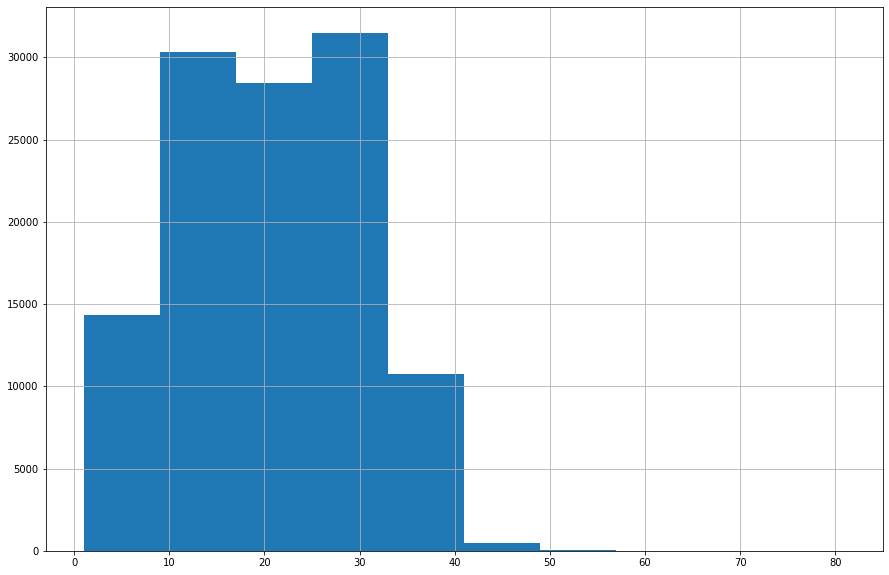

In [12]:
a = df['label'].apply(lambda x: len(x.split())).hist(figsize=(15, 10))

In [83]:
df['label'][df['label'].apply(lambda x: True if len(x.split()) == 1 else False)]

9755         патрубок
10006           хомут
15540          стулья
19710         домкрат
20438        расчёска
             ...     
86179            воск
86517         тoвары 
86655    аhтибиотики 
86931     дипиридaмол
87003     эторикоксиб
Name: label, Length: 92, dtype: object

In [13]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelEncoder()
Label_encoder.fit(df['id'])

LabelEncoder()

In [14]:
df['id'] = Label_encoder.fit_transform(df['id'])

/tmp/ipykernel_4168/1018509220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = Label_encoder.fit_transform(df['id'])


In [15]:
df

,id,label
0,1,прочее мясо рыбы включая фарш мороженые рыбный...
1,5,растения засушенные обработанные антисептиком ...
2,8,огурцы корнишоны консервированные для кратковр...
3,9,овощи сущенные чеснок сушенный хлопья маркиров...
4,13,бананы свежие зеленые сорта cavendish
...,...,...
115805,29,кунжут семена кунжута очищенные не дробленные ...
115806,29,образцы для сертификационных работ семена кунж...
115807,29,семена кунжута
115808,29,семена кунжута дробленые или недробленые


In [16]:
df.columns = ['labels', 'description']

In [17]:
df

,labels,description
0,1,прочее мясо рыбы включая фарш мороженые рыбный...
1,5,растения засушенные обработанные антисептиком ...
2,8,огурцы корнишоны консервированные для кратковр...
3,9,овощи сущенные чеснок сушенный хлопья маркиров...
4,13,бананы свежие зеленые сорта cavendish
...,...,...
115805,29,кунжут семена кунжута очищенные не дробленные ...
115806,29,образцы для сертификационных работ семена кунж...
115807,29,семена кунжута
115808,29,семена кунжута дробленые или недробленые


In [18]:
df.to_csv('../../cler_enc1406.csv', index=False)

In [19]:
np.save('./cl_classes1406.npy', Label_encoder.classes_)

In [20]:
df = df.sample(frac=1).reset_index(drop=True)
train = df[:int(len(df)*0.8)]
test =  df[int(len(df)*0.8):]

In [21]:
print(len(test['labels'].value_counts()))

509


In [22]:
train.to_csv('../../train.csv', index=False)
test.to_csv('../../test.csv', index=False)

In [16]:
model.named_parameters

<bound method Module.named_parameters of BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [23]:
torch.cuda.empty_cache()
import gc
gc.collect()

12

In [5]:
#!pip install datasets

In [24]:
from datasets import load_dataset, load_metric
dataset = load_dataset('csv', data_files={'train': '../../train.csv', 'test': '../../test.csv'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /home/sincosxy/.cache/huggingface/datasets/csv/default-6fed8607de194a78/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [25]:
dataset = dataset.map(lambda e: tokenizer(e['description'], truncation = True, max_length=100, padding='max_length'), batched=True)

Map:   0%|          | 0/92646 [00:00<?, ? examples/s]

Map:   0%|          | 0/23162 [00:00<?, ? examples/s]

In [26]:
pytorch_style_columns = ['input_ids', 'token_type_ids', 'attention_mask', 'labels']  # 
dataset = dataset.remove_columns(set(dataset['train'].features.keys()) - set(pytorch_style_columns))

In [27]:
set(dataset['train'].features.keys())


{'attention_mask', 'input_ids', 'labels', 'token_type_ids'}

In [28]:
dataset.set_format(type='torch', columns=pytorch_style_columns, device='cuda') 

In [29]:
dataset.shape

{'train': (92646, 4), 'test': (23162, 4)}

In [30]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset['train'], shuffle=True, batch_size=8)
test_dataloader = DataLoader(dataset['test'], shuffle=False, batch_size=8)
#если есть видеопамять около 10гб, можно поставить 8

In [31]:
len(train_dataloader)

11581

In [32]:

optimizer = AdamW(model.parameters(), lr=2e-6)

num_epochs = 15

num_training_steps = num_epochs * len(train_dataloader)


lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=2000,
    num_training_steps=num_training_steps
)

/home/sincosxy/.local/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [33]:
torch.cuda.empty_cache()
import gc
gc.collect()

69

In [34]:
from tqdm import tqdm

In [35]:
#next(iter(train_dataloader))
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024

In [36]:
num_epochs = 10

In [ ]:
best_f1 = 0.
show_train_loss_every_num_epoch = 0.1

for epoch in range(num_epochs):
    print(40*'-', '\nepoch', epoch+1)
    model.train()
    losses = []

    for i, batch in enumerate(tqdm(train_dataloader)):
        model.train()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        losses.append(loss.item())

        #f i%int(len(train_dataloader)*show_train_loss_every_num_epoch)==int(len(train_dataloader)*show_train_loss_every_num_epoch)-1:
    print(f'train loss [{i*100/len(train_dataloader):.2f}%]: {np.array(losses).mean():.3f}')
    losses = []
    print('\nvalidating')

    f1 = load_metric('f1')
    acc = load_metric('accuracy')
    precision = load_metric('precision')
    recall = load_metric('recall')
    with torch.no_grad():
        model.eval()
                
        for batch in tqdm(test_dataloader):
        ##for batch in test_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            f1.add_batch(predictions=predictions, references=batch["labels"])    
            acc.add_batch(predictions=predictions, references=batch["labels"])    
            precision.add_batch(predictions=predictions, references=batch["labels"])    
            recall.add_batch(predictions=predictions, references=batch["labels"])    

        print('weighted summary:')
        print('Test acc:', acc.compute()['accuracy'])
        print('Test precision:', precision.compute(average = 'weighted')['precision'])
        print('Test recall:', recall.compute(average = 'weighted')['recall'])
        f1_weighted = f1.compute(average = 'weighted')['f1']
        print('Test f1:', f1_weighted, '\n')

        if f1_weighted > best_f1:
            best_f1 = f1_weighted
            model.save_pretrained("../../best_model2705")

    model.train()

---------------------------------------- 
epoch 1


100%|██████████████████████████████████████████████████████████████████████████| 11581/11581 [53:06<00:00,  3.63it/s]
/tmp/ipykernel_4168/41845307.py:25: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  f1 = load_metric('f1')


train loss [99.99%]: 3.758

validating


100%|████████████████████████████████████████████████████████████████████████████| 2896/2896 [03:45<00:00, 12.86it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.6300837578792851
Test precision: 0.5206010521084815
Test recall: 0.6300837578792851
Test f1: 0.5431480670095736 

---------------------------------------- 
epoch 2


100%|██████████████████████████████████████████████████████████████████████████| 11581/11581 [53:09<00:00,  3.63it/s]


train loss [99.99%]: 1.853

validating


100%|████████████████████████████████████████████████████████████████████████████| 2896/2896 [03:45<00:00, 12.86it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


weighted summary:
Test acc: 0.7694499611432519
Test precision: 0.7161752018955169
Test recall: 0.7694499611432519
Test f1: 0.717336687753637 

---------------------------------------- 
epoch 3


 46%|██████████████████████████████████▊                                        | 5382/11581 [24:42<28:28,  3.63it/s]

In [16]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
Label_encoder = preprocessing.LabelEncoder()
Label_encoder.classes_ = np.load('./classes.npy', allow_pickle=True)

true = []
preds = []

model.eval()
for batch in tqdm(test_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    true += batch["labels"].detach().cpu().numpy().tolist()
    preds += predictions.detach().cpu().numpy().tolist()

print(classification_report(Label_encoder.inverse_transform(true), Label_encoder.inverse_transform(preds)))

100%|████████████████████████████████████████████████████████████████████████████| 2152/2152 [02:45<00:00, 13.01it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        0805       0.00      0.00      0.00         9
        0808       1.00      0.38      0.55        16
        1704       0.38      1.00      0.56        80
        1905       0.00      0.00      0.00        14
        2003       0.88      1.00      0.94        15
        2007       0.00      0.00      0.00         7
        2009       0.00      0.00      0.00         8
        2105       0.00      0.00      0.00         8
        2106       1.00      0.17      0.29        30
        2202       0.00      0.00      0.00         3
        2710       0.00      0.00      0.00         8
        2918       0.00      0.00      0.00        29
        2924       0.00      0.00      0.00        27
        2933       0.19      0.76      0.31        55
        2934       0.00      0.00      0.00        36
        2941       0.00      0.00      0.00        22
        3005       1.00      1.00      1.00        14
        3206       1.00    

/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
inputs = tokenizer('покрышки', truncation = True, max_length=100, padding='max_length', return_tensors="pt")
#batch = {k: torch.tensor(v).to(device) for k, v in txt.items()}
model.to(torch.device('cpu'))
with torch.no_grad():
    logits = model(**inputs).logits
predicted_class_id = logits.argmax().item()
#Label_encoder.inverse_transform(predicted_class_id)
a = []
a.append(predicted_class_id)

In [114]:
Label_encoder.inverse_transform([a])

array(['4011'], dtype=object)

In [17]:
def predict_class(text):
    model.to(torch.device('cpu'))
    inputs = tokenizer(text, truncation = True, max_length=100, padding='max_length', return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        predicted_class_id = logits.argmax().item()
        return Label_encoder.inverse_transform([predicted_class_id])


In [19]:
print(predict_class("Велосипед"), predict_class("велосипед"), predict_class("Велосипедов"))

['9503'] ['9503'] ['8714']
